In [1]:
import math
import warnings
import unittest
import numpy as np
from PIL import Image
import skimage.measure
import matplotlib.pyplot as plt

In [2]:
# Open square image for first experiments
im = np.array(Image.open("./lena.png"))

### 1) Implement a function that takes in the input image, kernel size and stride length and outputs the pooled image using Max Pool operation.

In [3]:
def check_inputs(im, kernel_size, stride):
    """ Check inputs from pooling functions. """
    if im.shape[0] != im.shape[1]:
        raise ValueError("Input image should be square")
    if not isinstance(im, np.ndarray) or im.ndim != 2:
        raise ValueError("Input image must be a two-dimensional numpy array")
    if stride > im.shape[0] or kernel_size > im.shape[0]:
        raise ValueError("Stride/Kernel size should be smaller than the input image")
    if stride <= 0 or kernel_size <= 0:
        raise ValueError("Stride/Kernel size should a positive number")
    if stride > kernel_size:
        warnings.warn("Stride is larger than kernel size." +
                      "Image is not totally covered during maxpooling operation")
    
def max_pool_square(im, kernel_size, stride):
    """
    :param im: 2-D numpy array. Square image 
               grayscale image of shape (x,y)
    :param kernel_size: Integer representing kernel size
    :param stride: Integer representing the stride of the
                max pool operation
    :return output_im: Output image after max pool
    """
    check_inputs(im, kernel_size, stride)
    shape, _ = im.shape # input is squared so second dim does not matter
    output_shape = (shape-kernel_size) // stride + 1
    output_im = np.zeros((output_shape, output_shape), dtype=im.dtype)
    for ii, step_y in enumerate(range(0, shape-kernel_size+1, stride)):
        for jj, step_x in enumerate(range(0, shape-kernel_size+1, stride)):
            max_element = im[step_y: step_y+kernel_size, 
                             step_x: step_x+kernel_size].max()
            output_im[ii, jj] = max_element
    return output_im

In [4]:
output_im = max_pool_square(im, 2, 2)
output_im_2 = skimage.measure.block_reduce(im, (2,2), np.max)

#### Output visualization
The function from the framework seem to use the same size of striding as kernel (it cannot be tweaked). Also, the framework uses padding which my version still lacks (it is implemented further in the notebook). Therefore, a direct comparison is only possible if the stride is the same as the kernel size and the kernel can cover the whole image without padding (This happens for kernel_size = 2,4,8,etc). However, my version is more customizable since kernel size and stride can be arbitrary chosen.

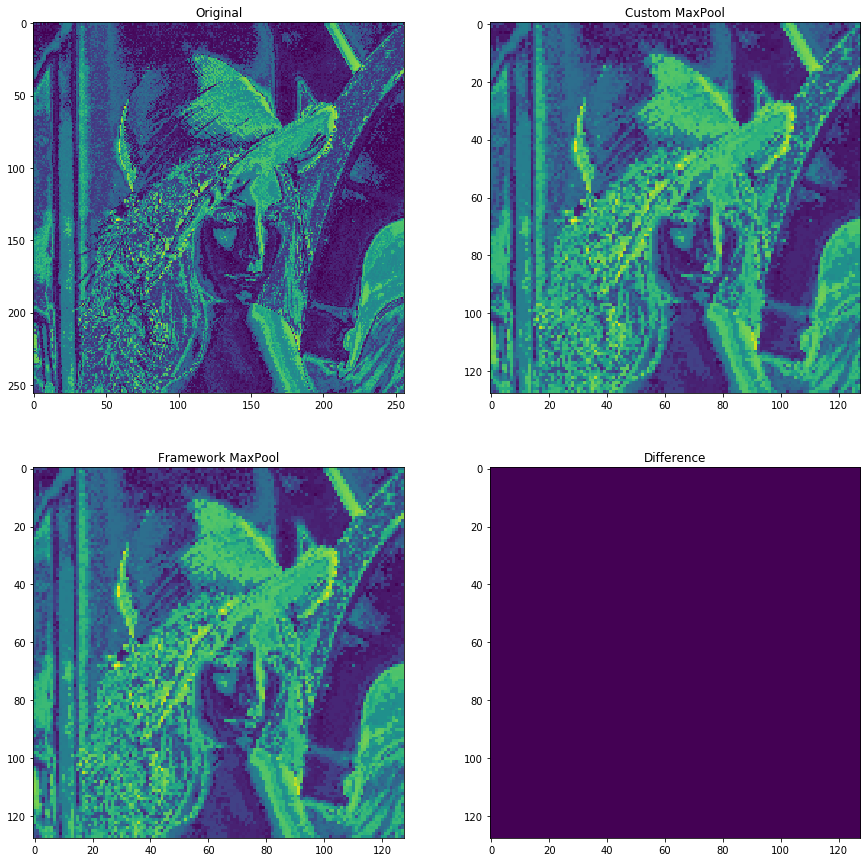

In [5]:
if np.equal(np.array(output_im.shape), np.array(output_im_2.shape)).all():
    f, ax = plt.subplots(2,2, figsize=(15, 15))
    images = {"Original": im, "Custom MaxPool": output_im, "Framework MaxPool": output_im_2, "Difference": output_im_2-output_im}
else:
    f, ax = plt.subplots(1,2, figsize=(15, 15))
    images = {"Original": im, "Custom MaxPool": output_im}
for ii, (title, img) in enumerate(images.items()):
    ax.ravel()[ii].set_title(title)
    ax.ravel()[ii].imshow(img)

### 2) Bonus: Change the max-pooling operation in your function to a min-pooling operation and also visualize the difference image!

In [6]:
def check_inputs_maxpool_custom_f(im, kernel_size, stride, func):
    """ Check inputs from pooling functions. """
    if im.shape[0] != im.shape[1]:
        raise ValueError("Input image should be square")
    if not isinstance(im, np.ndarray) or im.ndim != 2:
        raise ValueError("Input image must be a two-dimensional numpy array")
    if stride > im.shape[0] or kernel_size > im.shape[0]:
        raise ValueError("Stride/Kernel size should be smaller than the input image")
    if stride <= 0 or kernel_size <= 0:
        raise ValueError("Stride/Kernel size should a positive number")
    if stride > kernel_size:
        warnings.warn("Stride is larger than kernel size." +
                      "Image is not totally covered during maxpooling operation")
    if func not in [np.max, np.min, np.mean]:
        raise ValueError("Aggregator function must be np.min, np.max or np.mean")
    
def max_pool_square_custom_f(im, kernel_size, stride, func=np.max):
    """
    :param im: 2-D numpy array. Square image 
               grayscale image of shape (x,y)
    :param kernel_size: Integer representing kernel size
    :param stride: Integer representing the stride of the
                max pool operation
    :param func: Function. Aggregator function to reduce image. It
                can be choosen among np.min, np.max or np.mean
    :return output_im: Output image after function has been applied blockwise
    """
    check_inputs_maxpool_custom_f(im, kernel_size, stride, func)
    shape, _ = im.shape # input is squared so second dim does not matter
    output_shape = (shape-kernel_size) // stride + 1
    output_im = np.zeros((output_shape, output_shape))
    for ii, step_y in enumerate(range(0, shape-kernel_size+1, stride)):
        for jj, step_x in enumerate(range(0, shape-kernel_size+1, stride)):
            agg_element = func(im[step_y: step_y+kernel_size, 
                             step_x: step_x+kernel_size])
            output_im[ii, jj] = agg_element
    return output_im

In [7]:
output_im = max_pool_square_custom_f(im, 2, 2, np.min)
output_im_2 = skimage.measure.block_reduce(im, (2,2), np.min)

#### Output visualization
Same remark as above. Additionally, extra functions such as np.mean() can be called

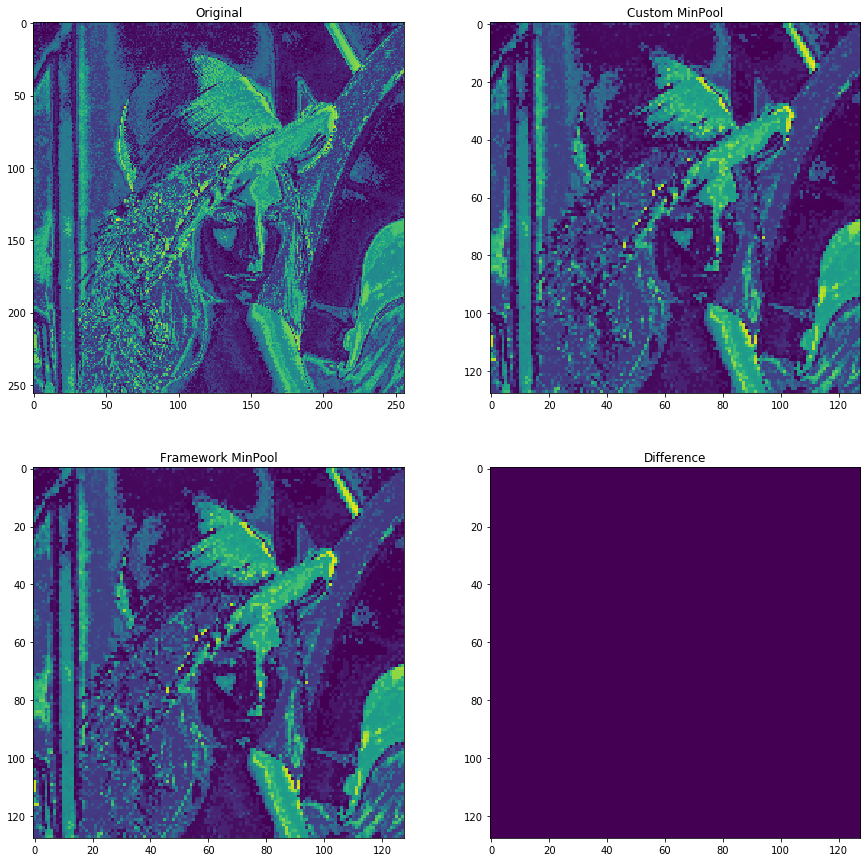

In [8]:
if np.equal(np.array(output_im.shape), np.array(output_im_2.shape)).all():
    f, ax = plt.subplots(2,2, figsize=(15, 15))
    images = {"Original": im, "Custom MinPool": output_im, "Framework MinPool": output_im_2, "Difference": output_im_2-output_im}
else:
    f, ax = plt.subplots(1,2, figsize=(15, 15))
    images = {"Original": im, "Custom MinPool": output_im}
for ii, (title, img) in enumerate(images.items()):
    ax.ravel()[ii].set_title(title)
    ax.ravel()[ii].imshow(img)

### 3) Challenge: Implement your function in a way that it is able to take an arbitrarily sized image and an arbitrarily sized kernel which is able to pad the input image to then perform the pooling operation.
So it could be compared with the framework, I added that the stride could be different in x and y.

In [9]:
# open munevo logo and transform it to grayscale
munevo = np.array(Image.open("./einstein.png").convert('L'))

/home/manuel/miniconda3/envs/mlgs/lib/python3.7/site-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [10]:
def check_inputs_maxpool(im, kernel_size, stride, func):
    """ Check inputs from pooling functions. """
    if not isinstance(im, np.ndarray) or im.ndim != 2:
        raise ValueError("Input image must be a two-dimensional numpy array")
    if not isinstance(kernel_size, tuple) or not isinstance(stride, tuple):
        raise ValueError("Kernel and stride must be a tuple")
    if len(kernel_size) != 2 or len(stride) != 2:
        raise ValueError("Stride and kernel size should have length 2")
    if len(kernel_size) != len(stride):
        raise ValueError("Stride and kernel size should have the same length")
    for ii in range(len(kernel_size)):
        if stride[ii] <= 0 or kernel_size[ii] <= 0:
            raise ValueError("Stride/Kernel size should a positive number")
        if stride[ii] > kernel_size[ii]:
            warnings.warn("Stride is larger than kernel size." +
                          "Image is not totally covered during maxpooling operation")
        if stride[ii] > im.shape[0] or stride[ii] > im.shape[1]:
            raise ValueError("Stride size should be smaller than the input image")
        if kernel_size[ii] > im.shape[0] or kernel_size[ii] > im.shape[1]:
            raise ValueError("Kernel size should be smaller than the input image")
    if func not in [np.max, np.min, np.mean]:
        raise ValueError("Aggregator function must be np.min, np.max or np.mean")
        
def pad(im, pad_row, pad_col):
    """
    Pads 2d input image of the form (rows, cols).
    Function receives the pixel number to add to both rows and
    columns and returns a padded image.
    :param im: 2-D numpy array. Image of shape (rows, cols)
    :param pad_row: Scalar. Pixels to pad the row dimension of the image
    :param pad_col: Scalar. Pixels to pad the column dimension of the image
    :return output_im: 2-D numpy array. Padded image
    """
    output_im = np.zeros((im.shape[0]+pad_row, im.shape[1] + pad_col))
    output_im[:im.shape[0], :im.shape[1]] = im
    return output_im
def max_pool(im, kernel_size, stride, func=np.max):
    """
    :param im: 2-D numpy array. Image 
               grayscale image of shape (x,y)
    :param kernel_size: Tuple representing kernel size
    :param stride: Integer representing the stride of the
                max pool operation
    :param func: Function. Aggregator function to reduce image. It
                can be choosen among np.min, np.max or np.mean
    :return output_im: Output image after max pool
    """
    check_inputs_maxpool(im, kernel_size, stride, func)
    # find the smallest paddding so the whole image is covered
    padding = [0]*im.ndim
    for dim in range(im.ndim):
        if im.shape[dim] % kernel_size[dim] != 0:
            padding[dim] = kernel_size[dim] - (dim % kernel_size[dim])
    im = pad(im, *padding)
    rows, cols = im.shape
    output_rows = (rows-kernel_size[0]) // stride[0] + 1
    output_cols = (cols-kernel_size[1]) // stride[1] + 1
    output_im = np.zeros((output_rows, output_cols), dtype=im.dtype)
    for ii, step_row in enumerate(range(0, rows-kernel_size[0]+1, stride[0])):
        for jj, step_col in enumerate(range(0, cols-kernel_size[1]+1, stride[1])):
            max_element = func(im[step_row: step_row+kernel_size[0], 
                             step_col: step_col+kernel_size[1]])
            output_im[ii, jj] = max_element
    return output_im

In [11]:
output_im = max_pool(munevo, (3,3), (3,3), np.max)
output_im_2 = skimage.measure.block_reduce(munevo, (3,3), np.max)

#### Output visualization

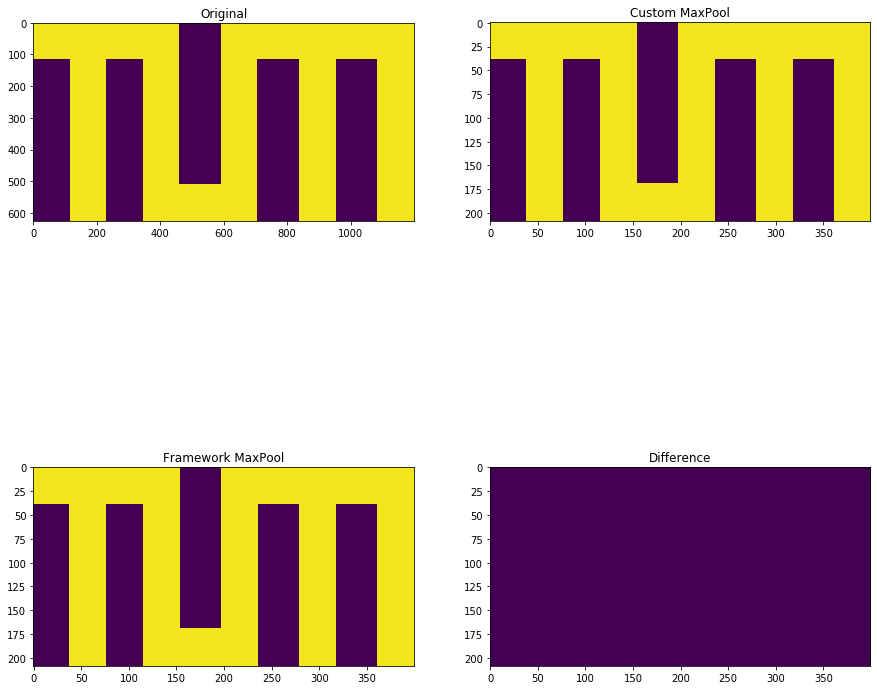

In [12]:
if np.equal(np.array(output_im.shape), np.array(output_im_2.shape)).all():
    f, ax = plt.subplots(2,2, figsize=(15, 15))
    images = {"Original": munevo, "Custom MaxPool": output_im, "Framework MaxPool": output_im_2, "Difference": output_im_2-output_im}
else:
    f, ax = plt.subplots(1,2, figsize=(15, 15))
    images = {"Original": im, "Custom MaxPool": output_im}
for ii, (title, img) in enumerate(images.items()):
    ax.ravel()[ii].set_title(title)
    ax.ravel()[ii].imshow(img)

### 4) Max pooling for arbitrary number of channels

In [13]:
# open munevo logo and transform it to grayscale
munevo_color = np.array(Image.open("./munevo_logo.png"))

FileNotFoundError: [Errno 2] No such file or directory: './munevo_logo.png'

In [ ]:
def check_inputs_maxpool_nchannels(im, kernel_size, stride, func):
    """ Check inputs from pooling functions. """
    if not isinstance(im, np.ndarray) or im.ndim != 3:
        raise ValueError("Input image must be a three-dimensional numpy array")
    if not isinstance(kernel_size, tuple) or not isinstance(stride, tuple):
        raise ValueError("Kernel and stride must be a tuple")
    if len(kernel_size) != 2 or len(stride) != 2:
        raise ValueError("Stride and kernel size should have length 2")
    if len(kernel_size) != len(stride):
        raise ValueError("Stride and kernel size should have the same length")
    for ii in range(len(kernel_size)):
        if stride[ii] <= 0 or kernel_size[ii] <= 0:
            raise ValueError("Stride/Kernel size should a positive number")
        if stride[ii] > kernel_size[ii]:
            warnings.warn("Stride is larger than kernel size." +
                          "Image is not totally covered during maxpooling operation")
        if stride[ii] > im.shape[0] or stride[ii] > im.shape[1]:
            raise ValueError("Stride size should be smaller than the input image")
        if kernel_size[ii] > im.shape[0] or kernel_size[ii] > im.shape[1]:
            raise ValueError("Kernel size should be smaller than the input image")
    if func not in [np.max, np.min, np.mean]:
        raise ValueError("Aggregator function must be np.min, np.max or np.mean")
def pad_with_channels(im, pad_row, pad_col):
    """
    Pads 3d input image of the form (rows, cols, channels).
    Function receives the pixel number to add to both rows and
    columns and returns a padded image.
    :param im: 3-D numpy array. Image of shape (rows, cols, channels)
    :param pad_row: Scalar. Pixels to pad the row dimension of the image
    :param pad_col: Scalar. Pixels to pad the column dimension of the image
    :return output_im: 3-D numpy array. Padded image
    
    """
    output_im = np.zeros((im.shape[0]+pad_row, im.shape[1] + pad_col, im.shape[-1]))
    output_im[:im.shape[0], :im.shape[1], :] = im
    return output_im.astype(im.dtype)
def max_pool_nchannel(im, kernel_size, stride, func=np.max):
    """
    :param im: 2-D numpy array.Image of shape (row, cols, channels)
    :param kernel_size: Tuple representing kernel size
    :param stride: Integer representing the stride of the
                max pool operation
    :param func: Function. Aggregator function to reduce image. It
                can be choosen among np.min, np.max or np.mean
    :return output_im: Output image after max pool
    """
    check_inputs_maxpool_nchannels(im, kernel_size, stride, func)
    # find the smallest paddding so the whole image is covered
    padding = [0]*(im.ndim-1)
    for dim in range(im.ndim-1):
        if im.shape[dim] % kernel_size[dim] != 0:
            padding[dim] = kernel_size[dim] - (dim % kernel_size[dim])
    im = pad_with_channels(im, *padding)
    rows, cols, channels = im.shape
    output_rows = (rows-kernel_size[0]) // stride[0] + 1
    output_cols = (cols-kernel_size[1]) // stride[1] + 1
    output_im = np.zeros((output_rows, output_cols, channels), dtype=im.dtype)
    for channel in range(channels):
        for ii, step_row in enumerate(range(0, rows-kernel_size[0]+1, stride[0])):
            for jj, step_col in enumerate(range(0, cols-kernel_size[1]+1, stride[1])):
                max_element = func(im[step_row: step_row+kernel_size[0], 
                                 step_col: step_col+kernel_size[1], 
                                      channel])
                output_im[ii, jj, channel] = max_element
    return output_im

In [ ]:
output_im = max_pool_nchannel(munevo_color, (3,3), (3,3), np.max)
output_im_2 = skimage.measure.block_reduce(munevo_color, (3,3,1), np.max)

In [ ]:
if np.equal(np.array(output_im.shape), np.array(output_im_2.shape)).all():
    f, ax = plt.subplots(2,2, figsize=(15, 15))
    images = {"Original": munevo, "Custom MaxPool": output_im, "Framework MaxPool": output_im_2, "Difference": output_im_2-output_im}
else:
    f, ax = plt.subplots(1,2, figsize=(15, 15))
    images = {"Original": im, "Custom MaxPool": output_im}
for ii, (title, img) in enumerate(images.items()):
    ax.ravel()[ii].set_title(title)
    ax.ravel()[ii].imshow(img)

In [ ]:
class TestMaxPool(unittest.TestCase):
    """ Test functions written along this notebook. 
    Find divisions to know which function they are referring to
    """
    
    # Test Max Pool square (part 1)
    
    def test_max_pool_simple_input(self):
        self.assertTrue(np.equal(max_pool_square(np.array([[1,2,3],
                                                [5,1,3],
                                                [3,6,1]]), 2,1), np.array([[5,3], [6,6]])).all())
    def test_image_is_square(self):
        with self.assertRaises(ValueError):
            max_pool_square(np.ones((300, 289)), 2, 2)
    
    def test_image_is_2dim(self):
        with self.assertRaises(ValueError):
            max_pool_square(np.ones((300, 289,1)), 2, 2)
            
    def test_stride_is_positive(self):
        with self.assertRaises(ValueError):
            max_pool_square(np.ones((300, 300)), 2, 0)
            
    def test_kernel_is_positive(self):
        with self.assertRaises(ValueError):
            max_pool_square(np.ones((300, 300)), -2, 5)
    
    # Test Max Pool with custom function (Part 2)
    
    def test_min_pool_simple_input(self):
        self.assertTrue(np.equal(max_pool_square_custom_f(np.array([[1,2,3],
                                                [5,1,3],
                                                [3,6,1]]), 2,1, np.min), np.array([[1,1], [1,1]])).all())
    def test_function_is_allowed(self):
        with self.assertRaises(ValueError):
            max_pool_square_custom_f(np.ones((300, 300)), 5, 5, np.random.random)
            
    
    # Test Max Pool with arbitrary height and width (Part 3)   
        
    def test_max_pool_random_height(self):
        self.assertTrue(np.equal(max_pool(np.array([[1,2,3],
                                                [5,1,3],
                                                [3,6,1],
                                                [5,3,1]]), (2,3),(2,3), np.max), np.array([[5], [6]])).all())
    def test_kernel_is_valid(self):
        possible_kernel_sizes = [1, (2,2,2), (-1,2)]
        random_idx = np.random.randint(2)
        with self.assertRaises(ValueError):
            max_pool(np.ones((300, 300)), possible_kernel_sizes[random_idx], (3,3), np.max)
    
    def test_stride_is_2d(self):
        possible_strides = [1, (2,2,2), (-1,2)]
        random_idx = np.random.randint(2)
        with self.assertRaises(ValueError):
            max_pool(np.ones((300, 300)), (3,3), possible_strides[random_idx], np.max)
    
    def test_kernel_and_stride_same_len(self):
        with self.assertRaises(ValueError):
            max_pool(np.ones((300, 300)), (3,3), (3,2,1), np.max)
            
    # Test Max Pool with arbitrary height, width and channels (Part 4)
    
    def test_max_pool_not_affects_channels(self):
        input_im = np.random.random((300, 300, 25))
        output_im = max_pool_nchannel(input_im, (3,3), (3,3), np.max)
        self.assertEqual(input_im.shape[-1], output_im.shape[-1])
        
    def test_max_pool_input_image_is_3d(self):
        with self.assertRaises(ValueError):
            max_pool_nchannel(np.ones((300, 300)), (3,3), (3,2), np.max)

unittest.main(argv=[''], verbosity=2, exit=False)